# Project - Stress Levels
Author: Joshua Posyluzny


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Below is the approach that I am going to follow:

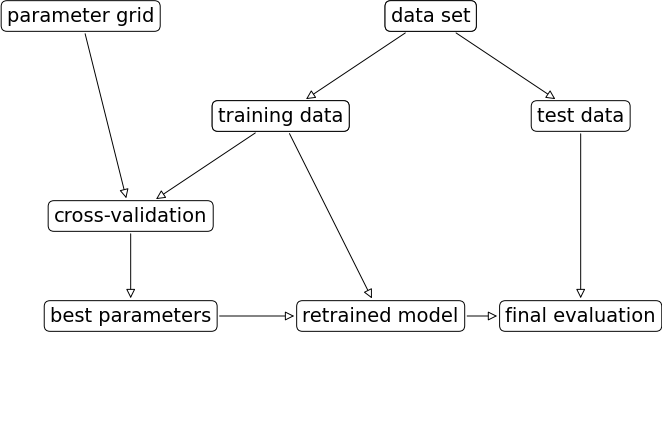

In [3]:
import mglearn
mglearn.plots.plot_grid_search_overview()

## Scoring Function Definition

In [13]:
from sklearn.metrics import mean_squared_error

def get_regressor_scores(model, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_valid = model.predict(X_test)
   
    train_mse = mean_squared_error(y_train, y_pred_train)
    valid_mse = mean_squared_error(y_test, y_pred_valid)
    
    print("For {} Model: Training Data MSE = {:.2f}".format(model.__class__.__name__, train_mse))
    print("For {} Model: Test Data MSE = {:.2f}".format(model.__class__.__name__, valid_mse))

## Load csv into a dataframe:

In [5]:
dataframe = pd.read_csv("Wellbeing_and_lifestyle_data.csv")
dataframe.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,DAILY_MEDITATION,AGE,GENDER
0,7/7/15,3,2,2,5,0,5,2,0,1,...,0,7,5,5,1,4,0,5,36 to 50,Female
1,7/7/15,2,3,4,3,8,10,5,2,2,...,5,8,2,2,2,3,2,6,36 to 50,Female
2,7/7/15,2,3,3,4,4,10,3,2,2,...,5,8,10,2,2,4,8,3,36 to 50,Female
3,7/7/15,3,3,10,3,10,7,2,5,2,...,0,5,7,5,1,5,2,0,51 or more,Female
4,7/7/15,5,1,3,3,10,4,2,4,2,...,0,7,0,0,2,8,1,5,51 or more,Female


## Drop Timestamp column, I don't feel it's relevant. Any yearly changes to stress levels should be reflected in the other features.

In [6]:
dataframe = dataframe.drop(columns='Timestamp')
dataframe.head()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,DAILY_MEDITATION,AGE,GENDER
0,3,2,2,5,0,5,2,0,1,6,...,0,7,5,5,1,4,0,5,36 to 50,Female
1,2,3,4,3,8,10,5,2,2,5,...,5,8,2,2,2,3,2,6,36 to 50,Female
2,2,3,3,4,4,10,3,2,2,2,...,5,8,10,2,2,4,8,3,36 to 50,Female
3,3,3,10,3,10,7,2,5,2,3,...,0,5,7,5,1,5,2,0,51 or more,Female
4,5,1,3,3,10,4,2,4,2,5,...,0,7,0,0,2,8,1,5,51 or more,Female


## Check the values in the prospective target vector, DAILY_STRESS

In [7]:
dataframe['DAILY_STRESS'].unique()

array(['2', '3', '1', '4', '5', '0', '1/1/00'], dtype=object)

## The '1/1/00' is going to cause problems, eliminate it from the dataframe.

In [9]:
dataframe = dataframe[pd.to_numeric(dataframe['DAILY_STRESS'], errors='coerce').notnull()]
dataframe['DAILY_STRESS'].unique()

array(['2', '3', '1', '4', '5', '0'], dtype=object)

## Create feature matrix X by dropping the DAILY_STRESS column, which is our target vector

In [10]:
X = dataframe.drop(columns='DAILY_STRESS')
X.head()

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,...,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,DAILY_MEDITATION,AGE,GENDER
0,3,2,5,0,5,2,0,1,6,4,...,0,7,5,5,1,4,0,5,36 to 50,Female
1,2,4,3,8,10,5,2,2,5,2,...,5,8,2,2,2,3,2,6,36 to 50,Female
2,2,3,4,4,10,3,2,2,2,2,...,5,8,10,2,2,4,8,3,36 to 50,Female
3,3,10,3,10,7,2,5,2,3,5,...,0,5,7,5,1,5,2,0,51 or more,Female
4,5,3,3,10,4,2,4,2,5,0,...,0,7,0,0,2,8,1,5,51 or more,Female


## Create target vector by selecting only the DAILY_STRESS column, check the unique values

In [11]:
y = dataframe['DAILY_STRESS']
y.head()

0    2
1    3
2    3
3    3
4    1
Name: DAILY_STRESS, dtype: object

In [12]:
y.value_counts()

3    3535
2    2698
4    2320
1    1997
5    1643
0     562
Name: DAILY_STRESS, dtype: int64

In [20]:
print("The shape of X is {}, and the type of X is {}".format(X.shape, type(X).__name__))
print("The shape of y is {}, and the type of y is {}".format(y.shape, type(y).__name__))

The shape of X is (12755, 21), and the type of X is DataFrame
The shape of y is (12755,), and the type of y is Series


## Plot each feature:

In [21]:
X.columns

Index(['FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS',
       'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'BMI_RANGE',
       'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS',
       'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'DAILY_MEDITATION', 'AGE',
       'GENDER'],
      dtype='object')

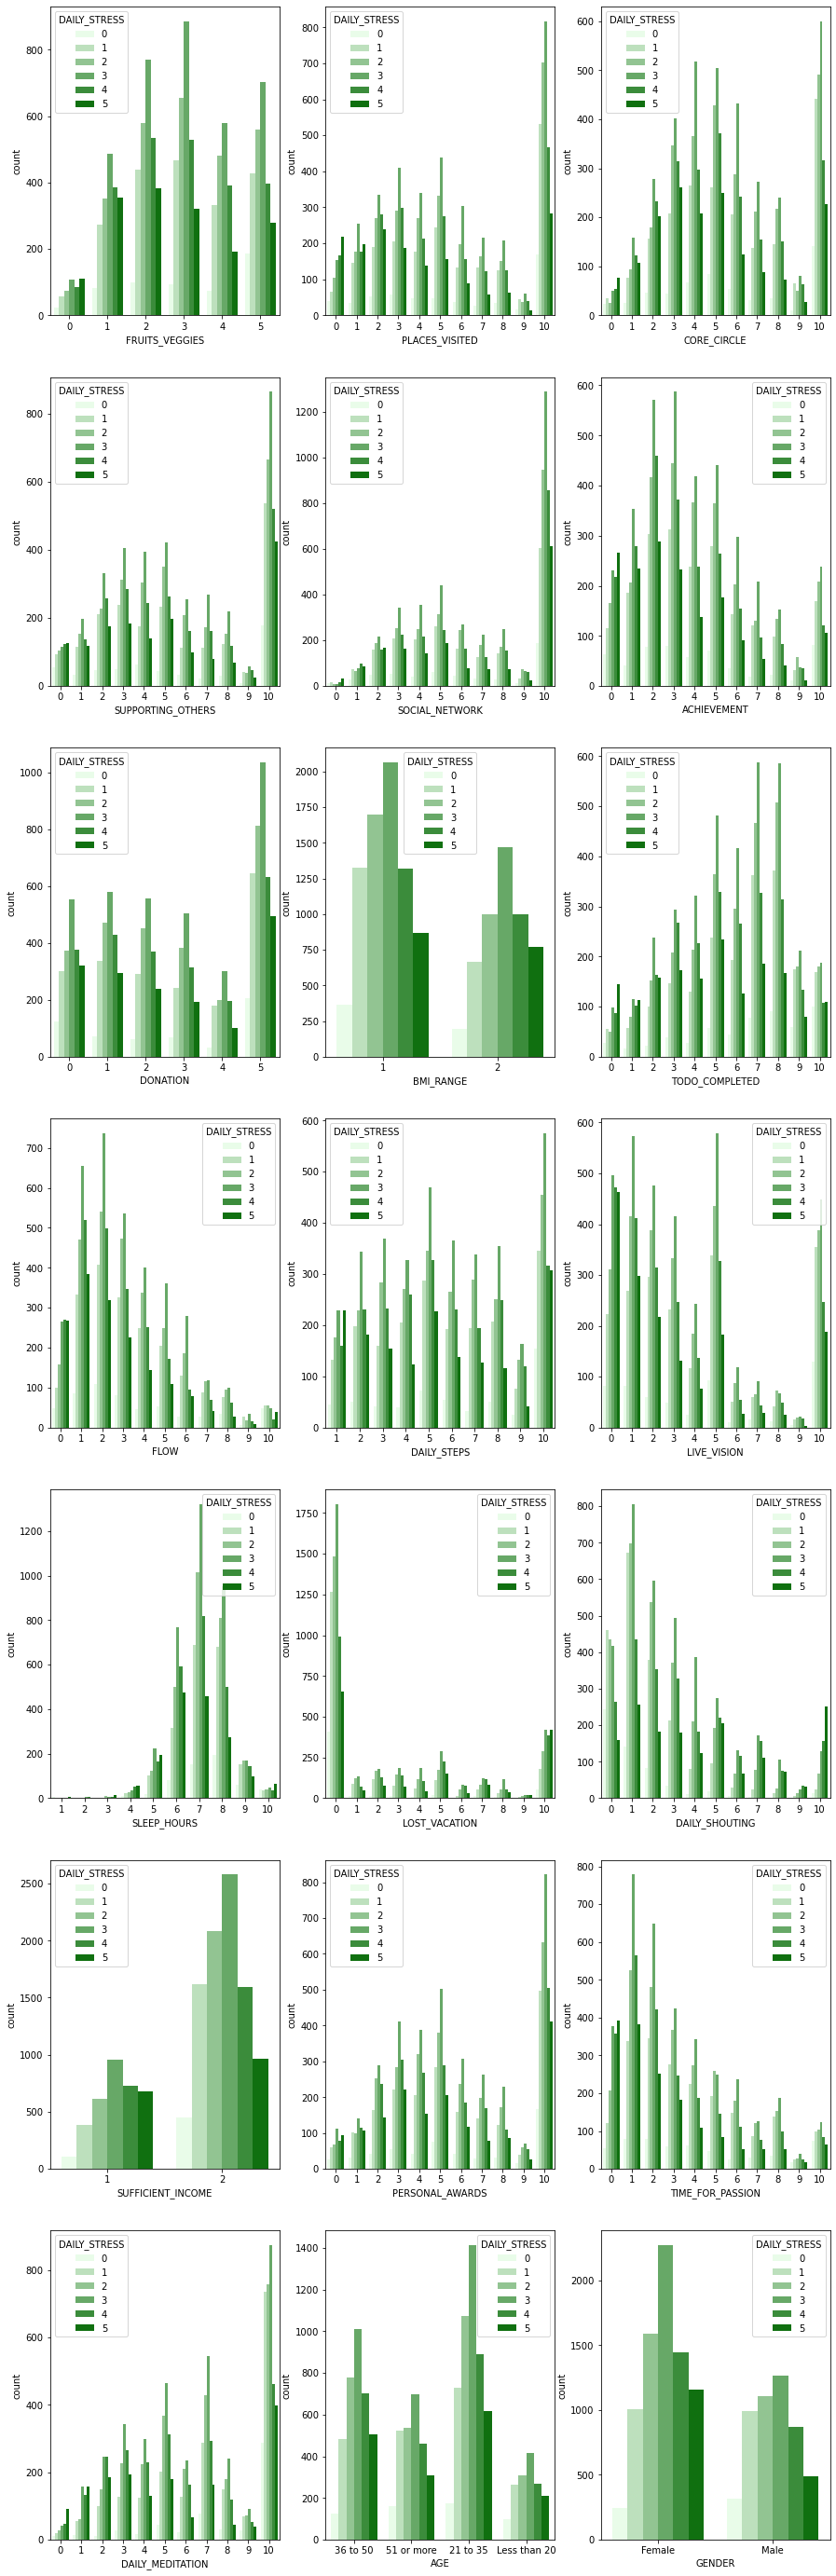

In [22]:
f, axes = plt.subplots(7, 3,figsize=(15,50))
row_counter = 0
col_counter = 0
for column in X.columns:
    sns.countplot(X[column], color='green', ax=axes[row_counter,col_counter], hue=y)
    col_counter += 1
    if(col_counter == 3):
        row_counter += 1
        col_counter = 0

Text(0.5, 1.0, 'Heatmap of Correlated Stress Dataset Features')

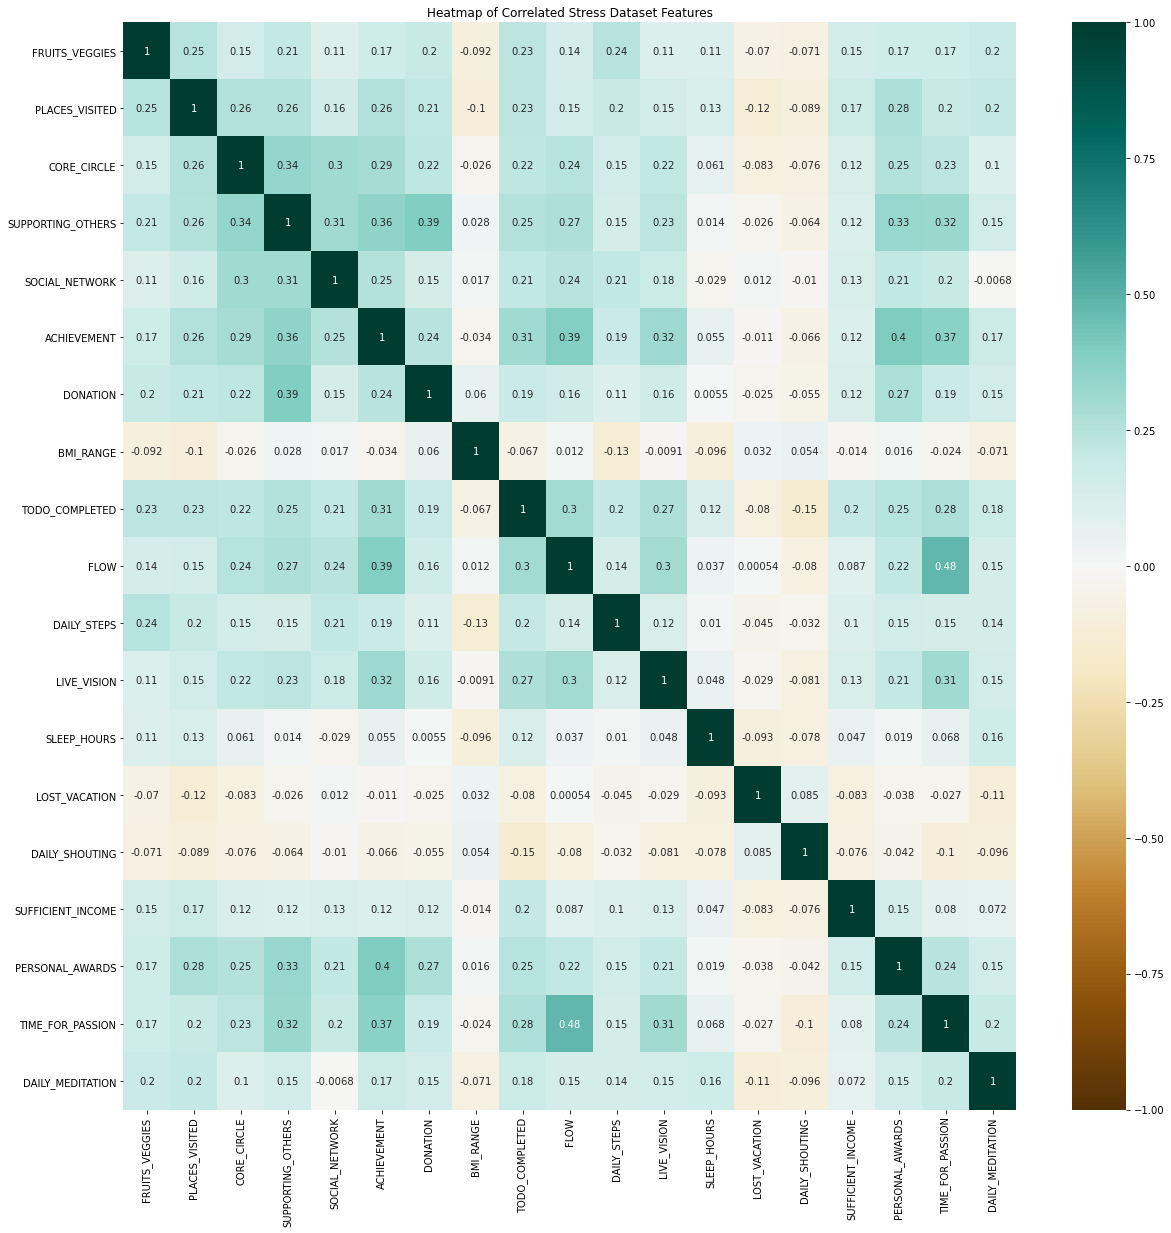

In [23]:
plt.subplots(figsize=(20,20))
stress_corr = X.corr()
sns.heatmap(data=stress_corr, vmin = -1, vmax = 1, annot = True, cmap = "BrBG")
plt.title("Heatmap of Correlated Stress Dataset Features")

In [131]:
y.value_counts()

3    3535
2    2698
4    2320
1    1997
5    1643
0     562
Name: DAILY_STRESS, dtype: int64

Text(0.5, 1.0, 'Histogram of Stress Counts')

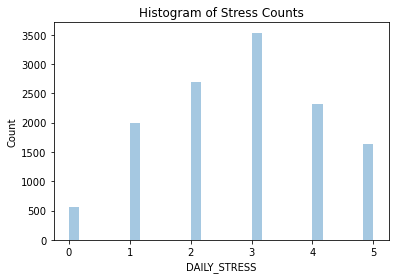

In [231]:
sns.distplot(y, kde=False)
plt.ylabel("Count")
plt.title("Histogram of Stress Counts")

In [36]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ct_encoded = ColumnTransformer([("onehot", OneHotEncoder(sparse=False), ['AGE', 'GENDER'])], remainder='passthrough')
ct_encoded_scaled = ColumnTransformer([("scaling", StandardScaler(), ['FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 
                                                                    'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'BMI_RANGE',
                                                                    'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS',
                                                                    'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME',
                                                                    'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'DAILY_MEDITATION']),
                                    ("onehot", OneHotEncoder(sparse=False), ['AGE', 'GENDER'])])

In [37]:
ct_encoded.fit(X)
X_trans_encoded = ct_encoded.transform(X)

# I am choosing to skip the pre-grid search cross validation step, as I want to see how good each model can possibly be upon optimization.

# Models to train: <br> Support Vector Machines, K Nearest Neighbors, Naive Bayes, RandomForest, and Gradient Boosting

# The following three models will not require scaling:

In [38]:
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_trans_encoded, y, random_state = 42)

### Grid search the BayesianRidge Model - This is done with a lot of help from Yousef

In [18]:
from sklearn.model_selection import GridSearchCV

bayesRidge = BayesianRidge()

a1 = np.linspace(0,1,10)
l1 = np.linspace(0,1,10)
a2 = np.linspace(0,1,10)
l2 = np.linspace(0,1,10)
# iter = list(range(100, 200, 400)) ==>100
# iter = [50,100,200] ==> 50
iter = [10,20,30,40, 50]
 
param_grid_bayesRidge = {
    'n_iter': iter,
    'alpha_1': a1,
    'lambda_1':l1,
    'alpha_2': a2,
    'lambda_2':l2,  
    'fit_intercept': [True, False]
}

gridBayesRidge = GridSearchCV(bayesRidge, param_grid_bayesRidge, cv = 7, scoring = 'neg_root_mean_squared_error', n_jobs = -1, return_train_score = True, verbose=False)

In [19]:
gridBayesRidge.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=BayesianRidge(), n_jobs=-1,
             param_grid={'alpha_1': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'alpha_2': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'fit_intercept': [True, False],
                         'lambda_1': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'lambda_2': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'n_iter': [10, 20, 30, 40, 50]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=False)

In [174]:
gridBayesRidge.best_params_

{'alpha_1': 1.0,
 'alpha_2': 0.0,
 'fit_intercept': True,
 'lambda_1': 0.0,
 'lambda_2': 0.1111111111111111,
 'n_iter': 10}

In [175]:
gridBayesRidge.best_score_

-1.2213570641726839

In [176]:
bayesRidgeModel = gridBayesRidge.best_estimator_
bayesRidgeModel.fit(X_train, y_train)
get_regressor_scores(bayesRidgeModel, X_train, X_test, y_train, y_test)

For BayesianRidge Model: Training Data MSE = 1.49
For BayesianRidge Model: Test Data MSE = 1.53


### Grid Search the RandomForestRegressor Model

In [22]:
forest = RandomForestRegressor(random_state = 42)

param_grid_forest = {'n_estimators': [700, 900, 1100, 1300],
              'max_depth': [15, 17, 19, 21],
              'max_features': ['auto', 'log2', None]}

gridForest = GridSearchCV(forest, param_grid_forest, cv = 7, scoring = 'neg_root_mean_squared_error', n_jobs = -1, return_train_score = True)

In [23]:
gridForest.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [15, 17, 19, 21],
                         'max_features': ['auto', 'log2', None],
                         'n_estimators': [700, 900, 1100, 1300]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [177]:
gridForest.best_params_

{'max_depth': 17, 'max_features': 'log2', 'n_estimators': 900}

In [178]:
gridForest.best_score_

-1.1928305289088252

In [179]:
forestModel = gridForest.best_estimator_
forestModel.fit(X_train, y_train)
get_regressor_scores(forestModel, X_train, X_test, y_train, y_test)

For RandomForestRegressor Model: Training Data MSE = 0.26
For RandomForestRegressor Model: Test Data MSE = 1.42


### Grid Search the GradientBoostingRegressor Model

In [157]:
gradient = GradientBoostingRegressor(random_state = 42)

param_grid_gradient = {'n_estimators': [700, 900, 1100, 1300],
              'max_depth': [1, 3, 5, 7],
              'learning_rate': [0.001, 0.01, 0.1, 1.0]}

gridGradient = GridSearchCV(gradient, param_grid_gradient, cv = 7, scoring = 'neg_root_mean_squared_error', n_jobs = -1, return_train_score = True)

In [158]:
gridGradient.fit(X_train, y_train)

C:\Users\Pozzy\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=7, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [700, 900, 1100, 1300]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [180]:
gridGradient.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1100}

In [181]:
gridGradient.best_score_

-0.8833839336710071

In [182]:
gradientModel = gridGradient.best_estimator_
gradientModel.fit(X_train, y_train)
get_regressor_scores(gradientModel, X_train, X_test, y_train, y_test)

For GradientBoostingRegressor Model: Training Data MSE = 1.35
For GradientBoostingRegressor Model: Test Data MSE = 1.50


# The following two models will require scaling

In [39]:
from sklearn.svm import LinearSVR # using LinearSVR because dataset is over 10,000 samples
from sklearn.neighbors import KNeighborsRegressor

In [40]:
ct_encoded_scaled.fit(X)
X_trans_encoded_scaled = ct_encoded.transform(X)

scaler = StandardScaler()
y_reshaped = y.values.reshape(-1,1)
y_scaled = scaler.fit(y_reshaped)
y_trans_scaled = y_scaled.transform(y_reshaped)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_trans_encoded_scaled, y_trans_scaled, random_state = 42)

### Grid Search the LinearSVR Model

In [165]:
linearSVR = LinearSVR(random_state = 42)

param_grid_SVR = {'C': [0.01,0.1,1],
                  'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive'],
                  'fit_intercept': [True,False],
                  'dual': [True,False],
                  'max_iter': [500,1000,1500]}

gridSVR = GridSearchCV(linearSVR, param_grid_SVR, cv = 7, scoring = 'neg_root_mean_squared_error', n_jobs = -1, return_train_score = True)

In [166]:
gridSVR.fit(X_train, y_train)

C:\Users\Pozzy\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Pozzy\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(cv=7, estimator=LinearSVR(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'dual': [True, False],
                         'fit_intercept': [True, False],
                         'loss': ['epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'max_iter': [500, 1000, 1500]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [255]:
gridSVR.best_params_

{'C': 0.1,
 'dual': True,
 'fit_intercept': True,
 'loss': 'squared_epsilon_insensitive',
 'max_iter': 1000}

In [187]:
gridSVR.best_score_

-0.8897722674786506

In [256]:
SVRModel = gridSVR.best_estimator_
SVRModel.fit(X_train, y_train)
get_regressor_scores(SVRModel, X_train, X_test, y_train, y_test)

C:\Users\Pozzy\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Pozzy\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Pozzy\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


For LinearSVR Model: Training Data MSE = 0.79
For LinearSVR Model: Test Data MSE = 0.81


C:\Users\Pozzy\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### Grid Search the K Nearest Neighbors Model

In [ ]:
kNearest = KNeighborsRegressor()

param_grid_KNN = {'n_neighbors': [50,60,70],
                 'algorithm': ['auto','ball_tree','kd_tree'],
                 'leaf_size': [30,40,50],
                 'p': [1,2]}

gridKNN = GridSearchCV(kNearest, param_grid_KNN, cv = 7, scoring = 'neg_root_mean_squared_error', n_jobs = -1, return_train_score = True)

In [74]:
gridKNN.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'leaf_size': [30, 40, 50], 'n_neighbors': [50, 60, 70],
                         'p': [1, 2]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [189]:
gridKNN.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 40, 'n_neighbors': 60, 'p': 1}

In [190]:
gridKNN.best_score_

-0.9107976304206089

In [191]:
KNNModel = gridKNN.best_estimator_
KNNModel.fit(X_train, y_train)
get_regressor_scores(KNNModel, X_train, X_test, y_train, y_test)

For KNeighborsRegressor Model: Training Data MSE = 0.80
For KNeighborsRegressor Model: Test Data MSE = 0.84


# Grid Search Results

# Bayesian Ridge: 
Best Parameters: 
['alpha_1': 1.0, 'alpha_2': 0.0, 'fit_intercept': True, 'lambda_1': 0.0, 'lambda_2': 0.1111111111111111, 'n_iter': 10] (Thanks again Yousef, you're a hero) <br>
Training MSE = 1.49 <br>
Validation MSE = 1.53

# RandomForest: 
Best Parameters: 
['max_depth': 17, 'max_features': 'log2', 'n_estimators': 900] <br>
Training MSE = 0.26 <br>
Validation MSE = 1.42 <br>

# GradientBoosting:
Best Parameters: 
['learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1100] <br>
Training MSE = 1.35 <br>
Validation MSE = 1.50 <br>

# Support Vector Machines:
Best Parameters:
['C': 0.1, 'dual': True, 'fit_intercept': True, 'loss': 'squared_epsilon_insensitive', 'max_iter': 1000]<br>
Training MSE = 0.79 <br>
Validation MSE = 0.81 <br>

# K Nearest Neighbors:
Best Parameters:
['algorithm': 'ball_tree', 'leaf_size': 40, 'n_neighbors': 60, 'p': 1]<br>
Training MSE = 0.80 <br>
Validation MSE = 0.84 <br>

From the scores above, it seems that the Support Vector Machines model Support Vector Regressor is the best predictor with this data, yielding the lowest validation MSE of 0.81.

### Predicted Stress vs Actual Stress Plot

In [44]:
y_test_reshaped = np.reshape(y_test, -1)

In [45]:
y_test_reshaped.shape

(3189,)

In [218]:
y_pred_valid.shape

(3189,)

C:\Users\Pozzy\anaconda3\envs\ensf-ml\lib\site-packages\seaborn\axisgrid.py:1665: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Pozzy\anaconda3\envs\ensf-ml\lib\site-packages\seaborn\axisgrid.py:1734: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


Text(0.5, 1.0, 'Actual vs Predicted Stress Data')

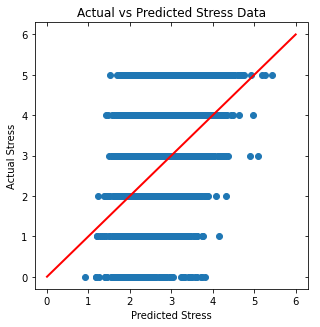

In [226]:
y_pred_valid = SVRModel.predict(X_test)

grid = sns.JointGrid(scaler.inverse_transform(y_pred_valid), scaler.inverse_transform(y_test_reshaped), space=0, size=5, ratio=50)
grid.plot_joint(plt.scatter)
plt.plot([0, 6], [0, 6], linewidth=2, color = 'r')
plt.ylabel("Actual Stress")
plt.xlabel("Predicted Stress")
plt.title("Actual vs Predicted Stress Data")

The appearance of the above plot leads me to believe that this may have been better suited as a classification task. I mean, the numbers make sense, but since the survey responses were discrete labels from 0 to 5, a regression model will calculate decimals when trying to predict the stress level where there shouldn't be. Also, it is interesting that this model wasn't able to predict a single stress level of 0. It was also not able to predict a single stress level of. It was able to get close to 5, but it seems that the model was in it's element when predicting stress levels of 2, 3, or 4. I am guessing that this is because 0, 1, and 5 had the least occurrences in the target vector value counts.

### Residual Plot

Text(0.5, 1.0, 'Plot of Difference in Predicted and Actual Stress vs Predicted Stress')

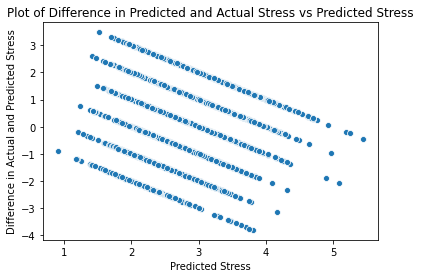

In [228]:
grid = sns.scatterplot(scaler.inverse_transform(y_pred_valid), (scaler.inverse_transform(y_test_reshaped)-scaler.inverse_transform(y_pred_valid)))
plt.ylabel("Difference in Actual and Predicted Stress")
plt.xlabel("Predicted Stress")
plt.title("Plot of Difference in Predicted and Actual Stress vs Predicted Stress")

### Plot Feature Importances

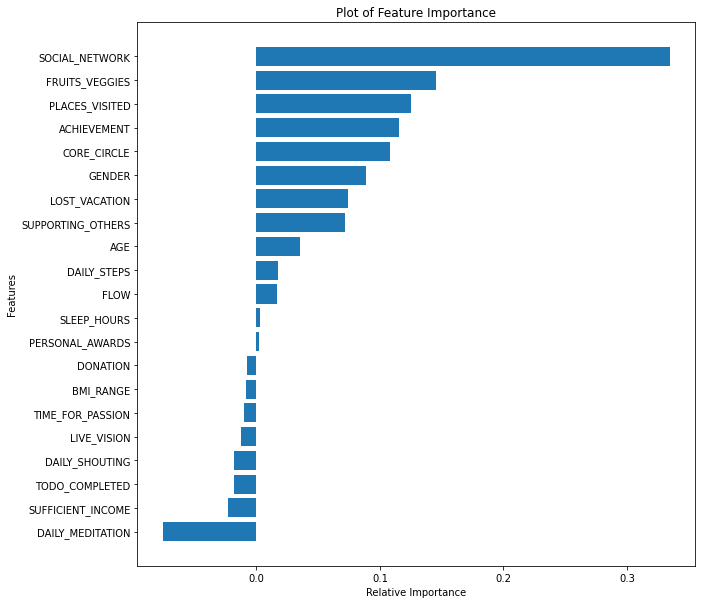

In [242]:
def feat_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.subplots(figsize=(10,10))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.ylabel("Features")
    plt.xlabel("Relative Importance")
    plt.title("Plot of Feature Importance")
    plt.show()
    
features_names = X.columns
feat_importances(SVRModel.coef_, features_names)

# Conclusion

Across all 5 models that I trained, the Support Vector Machine Regressor model performed the best with training and test MSEs of 0.79 and 0.81 respectively, although I do feel that it is still underfitted a bit.<br><br>
For the feature importance plot, the SOCIAL_NETWORK feature had the greatest impact on the model by far. This feature is on a scale of 0 to 10, and reflects on average how many people the interviewee interacts with on a given day. This indicates that the amount of people an interviewee interacts with on a daily basis is a good indicator for the stress levels they will experience. However, this is a subjective metric. Extroverts and introverts will have different responses to seeing less or more people in a day.<br><br>
The DAILY_MEDIATATION feature had the greatest negative impact on the model. This feature is also on a scale of 0 to 10, and reflects how many times per week the interviewee is able to mediate, pray, or engage in other relaxing activities. This indicates that the amount of times the interviewee is able to 'meditate' per week is a bad indicator for the stress levels they will experience.<br>
<br>
What is most surprising to me here is that SUFFICIENT_INCOME is not a strong indicator for predicting the stress levels of the interviewees. Personally, this would be a big factor for me, as a low income would lead to a lower sense of security, leading to higher stress levels.<br>
<br>
It is important to me to mention that all of this information needs to be taken with a large grain of salt. This is subjective data, not objective. All answers in the survey are the interviewees perception of their own world, and not actual definitive data reflecting the reality of their life. Each interviewee has a different perception of each feature and their own stress. Also, their mindset when taking the survey would have an impact on their answers. For example, if they had been experiencing a lot of bad days preceding this survey, the answers would likely be skewed in a negative way. Inversely, if they had been experiencing good fortune, their answers would be skewed positively. 

# Reflection

In this project, there were deviations from my proposal. I wasn't able to use the Naive Bayes, as I didn't realize that it was strictly a classification model, and it was swapped out for the Bayes Ridge model. Bayes Ridge is a linear model, so my comment of not using linear models was also false. Maybe I didn't need to have 5 models, but proposing 5 and only doing 4 felt like a cop-out to me, as frustrating as the Bayes Ridge was. Definitely a learning experience.<br>
<br>
Also, as I mentioned previously, I think this task may have been better suited to a classification method. Since the stress responses in the survey were discrete labels of 0 to 5, a classification model could have predicted those discrete labels. Instead, my regression model interpolated continuous values, making it more difficult to match the predicted value to the true value. Regardless, I am happy with how my best model performed. 